# GRIP : The Sparks Foundation

# Data Science and Business Analytics Intern

#  Author : Palak Jain 

# Task 1 : Prediction Using Supervised Machine Learning

## To predict the percentage of an student based on the no. of study hours.

In [1]:
#### IMPORTING THE LIBRARIES ####

import pandas as pd
import numpy as np
from numpy import cov
from scipy.stats import pearsonr
import seaborn as sns 
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle

import warnings as wg
wg.filterwarnings('ignore')

### Step 1 - Reading the data

In [2]:
### Reading Data from Import link ###

student_info=pd.read_csv('http://bit.ly/w-data')
print(student_info)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
student_info.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
student_info.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
new_row={'Hours':9.25}
student_info_to_predict=student_info.append(new_row,ignore_index=True)
student_info_to_predict

,Hours,Scores
0,2.50,21.0
1,5.10,47.0
2,3.20,27.0
3,8.50,75.0
4,3.50,30.0
5,1.50,20.0
6,9.20,88.0
7,5.50,60.0
8,8.30,81.0
9,2.70,25.0


### Step 2 - Data Visualization

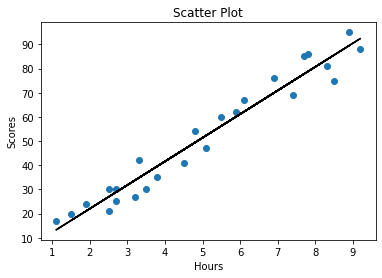

In [7]:
m,b=np.polyfit(student_info['Hours'],student_info['Scores'],1)
plt.plot(student_info['Hours'],(m*student_info['Hours'])+b,color='black')
plt.scatter(student_info['Hours'],student_info['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot')
plt.show()

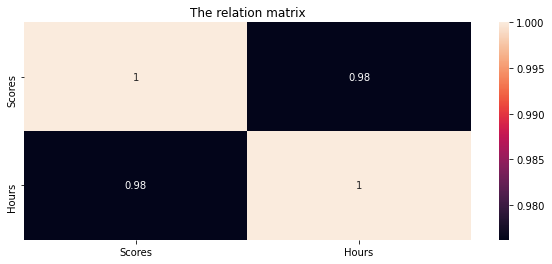

In [8]:
# Here the Heatmap shows positive correlation between the hours column and Scores column

plt.figure(figsize = (10,4))
sns.heatmap(student_info[['Scores','Hours']].corr(),annot=True)
plt.title ('The relation matrix',fontsize = 12)
plt.show()

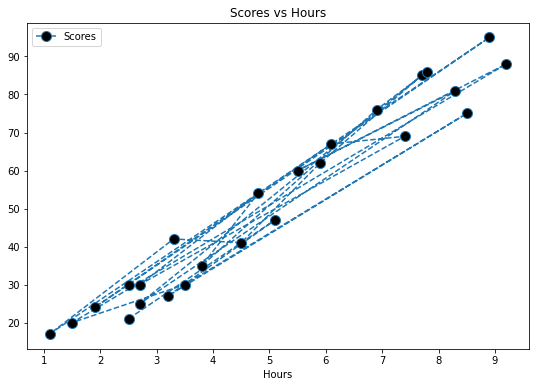

In [9]:
student_info.plot("Hours","Scores",linestyle="--",marker = "o",markersize = "10",markerfacecolor = "black",figsize = (9,6))
plt.title('Scores vs Hours')
plt.show()

### Step 3

Covariance Matrix

In [10]:
from numpy import cov
Covariance_Matrix= cov(student_info['Hours'],student_info['Scores'])
Hours_Variance=Covariance_Matrix[0][0]
Scores_Variance=Covariance_Matrix[1][1]

Correlation Coefficient

In [11]:
from scipy.stats import pearsonr
Correlation_Coef=pearsonr(student_info['Hours'],student_info['Scores'])
Correlation_Coef=Correlation_Coef[0]

Linear Regression

In [12]:
lr=LinearRegression()
x_feat=pd.DataFrame(student_info['Hours'])
y_targ=pd.DataFrame(student_info['Scores'])
fitted=lr.fit(x_feat,y_targ)
fitted.intercept_
fitted.coef_

array([[9.77580339]])

Predicting the score at 9.25 hours

In [13]:
student_info_to_predict.fillna(np.asscalar(lr.predict(pd.DataFrame(student_info_to_predict['Hours'].truncate(before=25)))),inplace=True)
student_info_to_predict['Scores']=student_info_to_predict['Scores'].round(0).astype(int)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_feat,y_targ,test_size=0.4,random_state=1)
lr.fit(x_train,y_train)
lr.predict(x_test)
from sklearn.metrics import r2_score
R_Squared=r2_score(lr.predict(x_test),y_test)*100
student_info_to_predict

,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30
5,1.50,20
6,9.20,88
7,5.50,60
8,8.30,81
9,2.70,25


### So, at 9.25 hours the score will be 93.

In [15]:
Covariance_Matrix

array([[  6.3761    ,  62.3315    ],
       [ 62.3315    , 639.42666667]])

In [16]:
Hours_Variance

6.376099999999999

In [17]:
Scores_Variance

639.4266666666665

In [18]:
Correlation_Coef

0.9761906560220884

In [19]:
R_Squared

92.58187868837227